# Noise Reduction 

In [1]:
from dataset import BirdData
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
data = BirdData()

In [3]:
file = 1

fs, audio_buffer_full = data._read_audio("{}.wav".format(file))

In [4]:
audio_length = 10

frame_duration = 50 # milli seconds
frame_size = int(frame_duration / 1000 * fs)
start_frame = 0*fs

In [5]:
audio_buffer = audio_buffer_full[:audio_length*fs, 0] # only use channel 1 for now

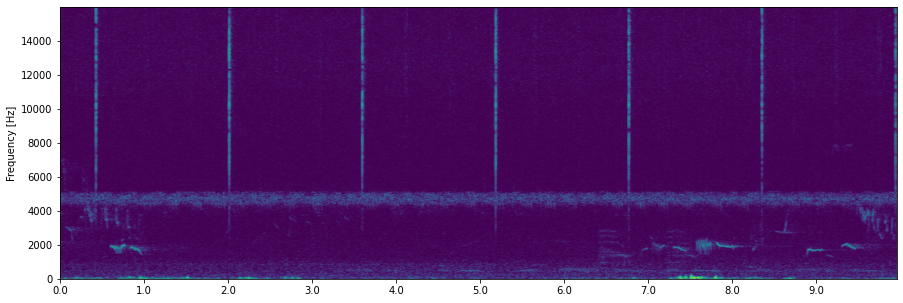

In [6]:
spec, fig = data.plot_spectrogram(audio_buffer, fs, frame_size, log_spectrogram=True)

## Bandpass Filter

In [7]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [8]:
filtered_audio = butter_bandpass_filter(audio_buffer, 1000, 8000, fs)

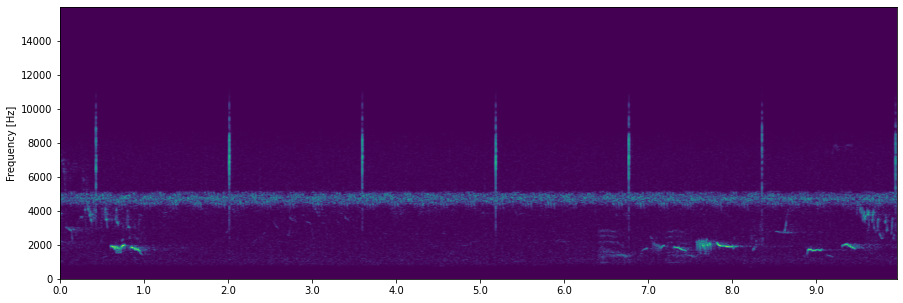

In [9]:
spec, fig = data.plot_spectrogram(filtered_audio, fs, frame_size, log_spectrogram=True)

In [10]:
ipd.Audio(filtered_audio, rate=fs)

## noisereduce Library

In [11]:
import noisereduce as nr

reduced_noise = nr.reduce_noise(y=audio_buffer,sr=fs) 

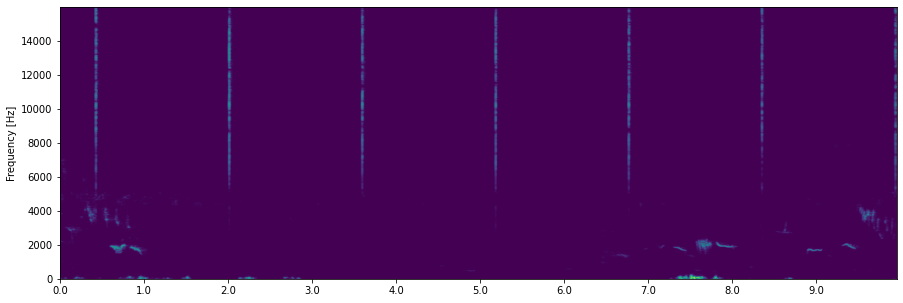

In [12]:
spec, fig = data.plot_spectrogram(reduced_noise, fs, frame_size, log_spectrogram=True)

In [13]:
ipd.Audio(reduced_noise, rate=fs)

## Ensemble Approach

In [14]:
reduced_filtered_audio = butter_bandpass_filter(reduced_noise, 1000, 4000, fs)

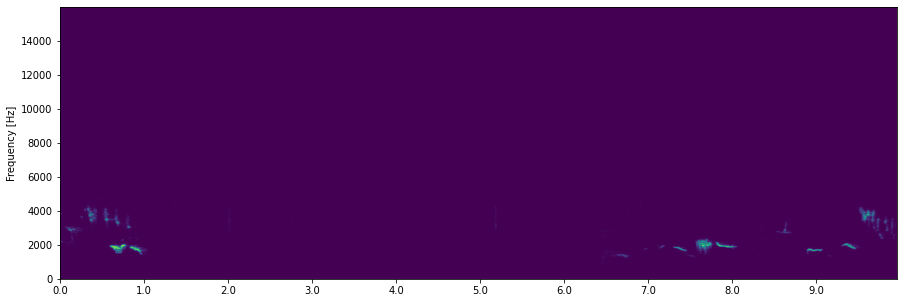

In [15]:
spec, fig = data.plot_spectrogram(reduced_filtered_audio, fs, frame_size, log_spectrogram=True)

In [16]:
ipd.Audio(reduced_filtered_audio, rate=fs)

In [17]:
spec

array([[2.63320669e-05, 5.74396377e-09, 3.32007742e-07, ...,
        3.80490786e-08, 2.07323559e-06, 9.27700746e-08],
       [1.31511224e-05, 2.87855258e-09, 1.65168951e-07, ...,
        1.90931000e-08, 1.03676796e-06, 4.65424494e-08],
       [2.15083598e-12, 2.02508768e-15, 4.96917944e-13, ...,
        2.70976018e-14, 2.89298240e-15, 5.93061392e-14],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])